In [16]:
import numpy as np 
import pandas as pd 

# use bash/ terminal to avoid installation errors with prophet $ pip install prophet
from prophet import Prophet
import matplotlib.pyplot as plt

#selects source csv file, must be in same root folder as this program
df = pd.read_csv("eth1yo.csv")


In [17]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-05,402.142944,417.525940,397.245819,414.067352,414.067352,1.544071e+10
1,2020-11-06,414.066711,456.200623,412.982300,454.719299,454.719299,1.673831e+10
2,2020-11-07,454.722565,465.675476,428.456360,435.713135,435.713135,1.887329e+10
3,2020-11-08,435.718811,457.780457,433.153778,453.554779,453.554779,1.129238e+10
4,2020-11-09,453.574158,457.349609,435.163879,444.163055,444.163055,1.370432e+10
5,2020-11-10,444.166382,453.758362,439.600128,449.679626,449.679626,1.209038e+10
6,2020-11-11,449.679657,473.578857,449.524933,462.960541,462.960541,1.407540e+10
7,2020-11-12,462.959534,467.677826,452.072418,461.005280,461.005280,1.287733e+10
8,2020-11-13,461.005493,475.217255,457.298248,474.626434,474.626434,1.319151e+10
9,2020-11-14,474.626434,475.161438,452.986084,460.149841,460.149841,1.031204e+10


In [18]:
df.shape

(366, 7)

In [19]:
# Select Date and Price, 
# Use closing prices: opening price is only reflective of sentiments for the day, the close is the result of the day
df = df[["Date","Close"]] 
# These exact renamings of the two columns are required for the model fitting
df = df.rename(columns = {"Date":"ds","Close":"y"}) 
df.head()

,ds,y
0,2020-11-05,414.067352
1,2020-11-06,454.719299
2,2020-11-07,435.713135
3,2020-11-08,453.554779
4,2020-11-09,444.163055


In [23]:

# The Prophet class (model)
fbp = Prophet(daily_seasonality = True) 
 # Fit the model 
fbp.fit(df)
# We need to specify the number of days in future
# This predicts the next 365 days from final real date in dataset
fut = fbp.make_future_dataframe(periods=180) 
forecast = fbp.predict(fut)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [24]:
print(forecast)

            ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2020-11-05   377.106227  -232.991873   693.207181   377.106227   
1   2020-11-06   390.327799  -222.346405   706.630440   390.327799   
2   2020-11-07   403.549371  -209.189062   677.469164   403.549371   
3   2020-11-08   416.770942  -152.710879   754.860639   416.770942   
4   2020-11-09   429.992514  -186.098934   748.237498   429.992514   
..         ...          ...          ...          ...          ...   
541 2022-04-30  7000.542675  5859.744032  7883.548791  6210.228600   
542 2022-05-01  7015.996799  5914.555103  7856.933700  6216.189926   
543 2022-05-02  7031.450924  5926.593403  7915.174695  6215.187663   
544 2022-05-03  7046.905048  5924.244593  7926.778046  6215.525696   
545 2022-05-04  7062.359172  6024.535870  7932.074756  6221.171488   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     377.106227     -141.318107           -141.318107           -141.318107   

In [25]:
# this steps preps the important predictive data into a table to make visualizations
forecast = fbp.predict(fut)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
541,2022-04-30,6853.732786,5893.490805,7777.365742
542,2022-05-01,6872.286220,5891.905207,7815.064507
543,2022-05-02,6884.701455,5907.349582,7831.530621
544,2022-05-03,6895.418892,5917.363263,7866.603987
545,2022-05-04,6931.568335,5953.092713,7902.000334


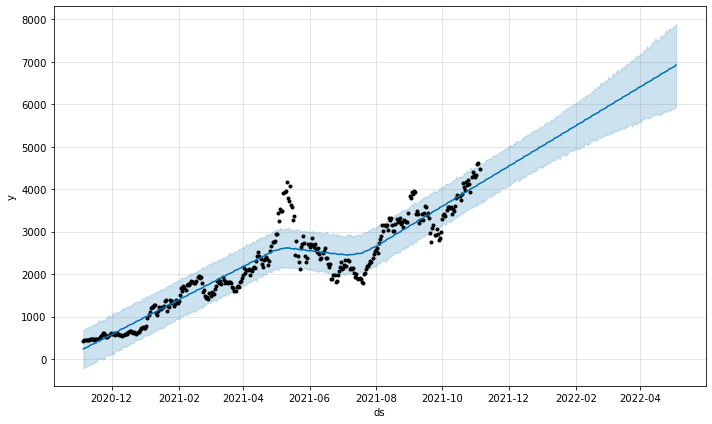

In [26]:
# This step uses plotly to marge the real data points with the predictive points
fig1 = fbp.plot(forecast)

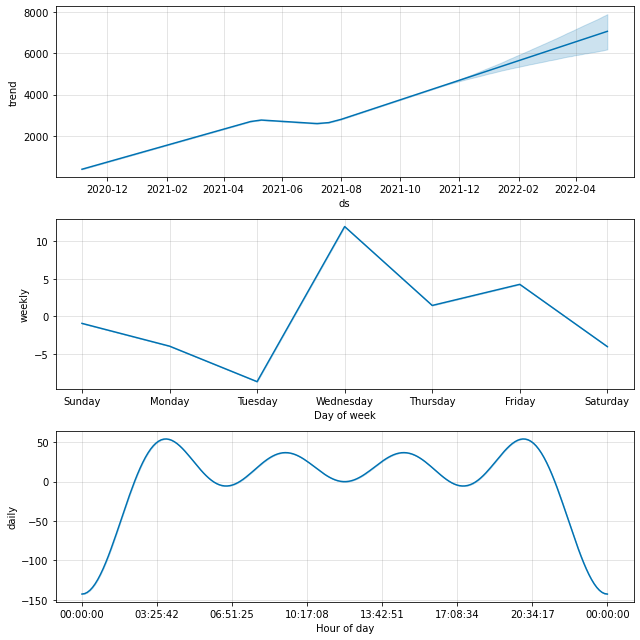

In [27]:
fig2 = fbp.plot_components(forecast)